# STAT201 FINAL REPORT 
### Comparison of Cyber Security Professional Salaries During the COVID-19 Pandemic 

#### **Group 25**: 

#### Antarip Kashyap, Joel Bonnie, Renata Lovette, Zhen Wang 


## Introduction
Cyber Security is a fast growing and essential sector of the Information Technology industry. It deals with securing computer based systems and networks, and resolving the increasing threats to private companies and government institutions.

In this project we aim to analyze a sample of salaries for cyber security professionals by determining whether there was a general difference in the salaries received by professionals in 2021 and 2022 (i.e., during the COVID 19 pandemic). The explanatory variable and response variable in our project would be the work year and the salary.. Thus, using the mean salary for the location parameter and the standard deviation for the scale parameter is appropriate to compare salaries between years.

Our dataset, obtained from **Infosec-Jobs**, was created through a survey collecting salaries of cybersecurity and infosec professionals. The variables in the dataset we would be interested in are the `work_year` and `salary_in_usd` variable. The former corresponds to the work year and the latter corresponds to the gross salary of a given worker (converted to USD). 

According to a study done by Lallie et. al. -  ‘The increased anxiety caused by the pandemic heightened the likelihood of cyber-attacks succeeding corresponding with an increase in the number and range of cyber-attacks’. The COVID-19 Pandemic resulted in many institutions switching most of their operations to an online medium. Muthuppalaniappan and Stevenson stated that healthcare organizations and universities are now also facing heightened cyber-security threats in the midst of the pandemic. 

**We wish to hypothesize whether this tremendous increase in cyber warfare from the onset of the pandemic has had a statistically significant impact on cybersecurity salaries.**


## Preliminary Analysis

First, we will import the required libraries that we intend to use in this report, and use `set.seed` for reproducibility:

In [2]:
# Importing required libraries

library(tidyverse)
library(broom)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

# Setting seed
set.seed(1000)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




The dataset was saved to the project repository hosted on GitHub, allowing us to read the data directly from the web. 
We can take a look at the first few rows using the head function:

In [3]:
# reading the dataset

money <- read_csv('https://raw.githubusercontent.com/joelbonnie/stat201Project/main/salaries.csv')
head(money)

Rows: 2323 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (4): work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2023,SE,FT,Security Engineer,150000,USD,150000,US,0,US,M
2023,SE,FT,Security Engineer,120000,USD,120000,US,0,US,M
2023,SE,FT,Security Engineer,120000,USD,120000,US,0,US,M
2023,SE,FT,Security Engineer,85000,USD,85000,US,0,US,M
2023,SE,FT,Security Engineer,240500,USD,240500,US,0,US,M
2023,SE,FT,Security Engineer,137500,USD,137500,US,0,US,M


*Table 1: Full Dataset*

<br>The columns we wish to consider for this analysis are the following:
`work_year` <br>
`salary_in_usd` <br>

We will filter the columns for the years 2021 and 2022.

In [4]:
# tidy data frame to include only work_year and salary_in_usd columns 
# corresponding to the 2021 and 2022 work year.
money_relevant <- money |>
    filter(!is.na(salary_in_usd))|>
    filter(work_year == 2021 | work_year == 2022) |>
    select(work_year, salary_in_usd)

# convert the work_year column as factor
money_relevant$work_year <- as.factor(money_relevant$work_year)

head(money_relevant)

work_year,salary_in_usd
<fct>,<dbl>
2022,126080
2022,60000
2021,6085
2022,64000
2022,117000
2022,75000


*Table 2: Tidied Data*

<br> We can now calculate the sample statistics:
- `mean_wage` corresponds to the mean salary for the given year. 
- `sd_wage` corresponds to the standard deviation of the salaries for the given year.
- `n` corresponds to the number of entries in each year.

In [5]:
# calculate the mean wage, standard deviation of the wage and number of observations for each work year
annual_average <- money_relevant |> 
    filter(!is.na(salary_in_usd)) |>
    group_by(work_year) |>
    summarize(mean_wage = mean(salary_in_usd), sd_wage = sd(salary_in_usd),
             n = n())
annual_average

work_year,mean_wage,sd_wage,n
<fct>,<dbl>,<dbl>,<int>
2021,105728.4,57923.03,485
2022,133228.4,60346.89,1067


*Table 3: Statistics Summary*


<br>Visualizing this using a box plot:

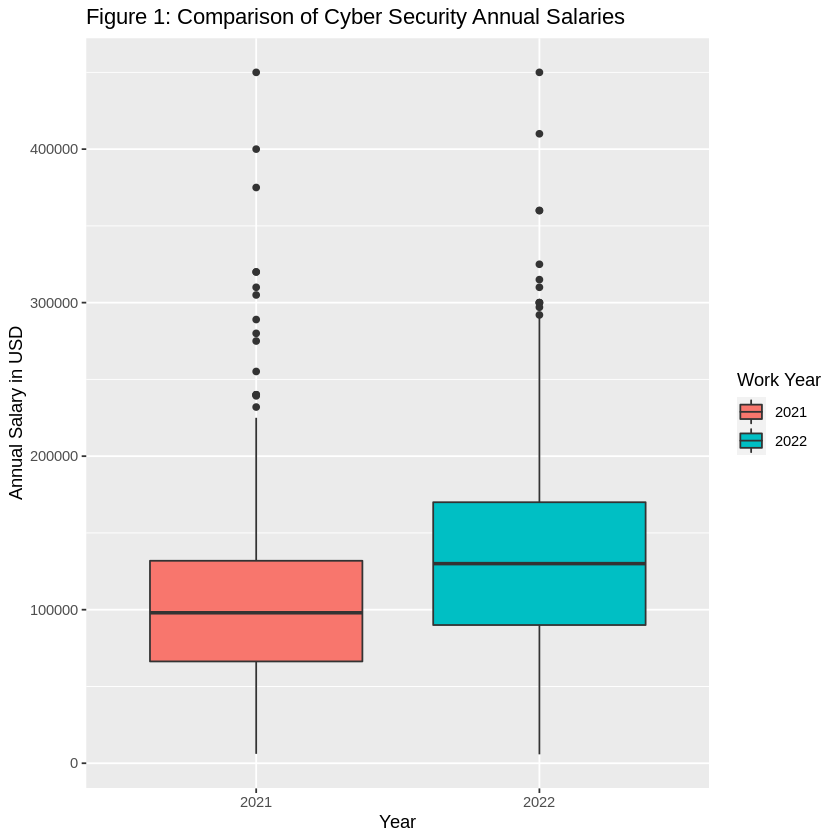

In [6]:
# Using a box plot, we compare the average annual salaries of 2021 and 2022. 
options(scipen = 5000)
aa_graph <- money_relevant |>   
    ggplot() +
    geom_boxplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    xlab("Year") +
    ylab("Annual Salary in USD") +
    labs(fill = "Work Year")+
    ggtitle("Figure 1: Comparison of Cyber Security Annual Salaries")
aa_graph

The range for each of the plots are the same so the observations for the 2 populations as a whole have the same spread. However, their interquartile ranges differ with 2022 having a wider spread indicating that the observations from 2021 are more consistent. The box plot also shows that the average annual salary is greater in 2022 and in 2021, preliminarily inferring a potential **increase in the salaries for jobs within cyber security.**

<br>We create a overlaid histogram showing the variation of salaries for the two specified years:


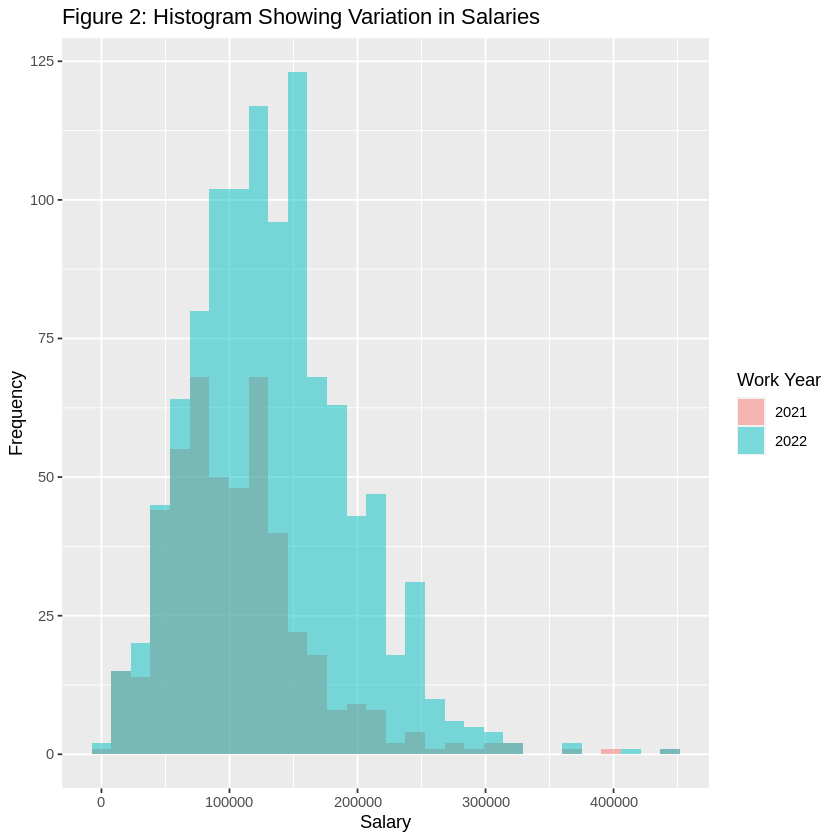

In [15]:
# creating the histogram with an alpha value of 0.5 and filling by the work year
options(scipen = 5000)
salaryHistogram <- money_relevant |>
    ggplot()+
    geom_histogram(aes(x = salary_in_usd,fill = work_year),
                       alpha = 0.5, bins = 30,position = 'identity') +
    labs(x = "Salary", y = "Frequency", fill = "Work Year") +
    ggtitle("Figure 2: Histogram Showing Variation in Salaries")


salaryHistogram

<br> 
From the histogram, we can note that generally, the frequency of observations in 2022 is greater than 2021. This aligns with the summary in Table 3. If we compare the peak of the 2 graphs, we can see that the peak of 2022 observations occur between $\$100,000$ and $ \$200,000$. For 2021, the peak occurred between $\$50,000$ and $\$150,000$ which is less than the peak of 2022. 

## Methods

### Plan:
Due to the difference in the mean salaries, it would be pertinent to investigate whether there is truly an increase in the mean salary between the two years. Our plots and the acquisition of the mean values from the dataset is not sufficient to indicate such an increase since a single sample and the statistics gained from them are not representative of the entire population and the corresponding population parameters.

We will bootstrap the sample to gain an insight into the overall sampling distribution.

We will also perform a hypothesis test of the following hypotheses, where we indicate Population 2 to be salaries in 2022 and Population 1 to be salaries in 2021:

<div align="center"> $H_0: \mu_1 - \mu_2 = 0$ </div>

<div align="center"> $H_1: \mu_1 - \mu_2 ≠ 0$ </div>

- $\mu_1$ refers the population mean of Population 1, that is, Cyber Security salaries in 2021
- $\mu_2$ refers to the population mean of Population 2, that is, Cyber Security salaries in 2022


We will make use of the **Central Limit Theorem**. This is to ensure the test is less computationally intensive and since we are unaware of the population distribution.

Since we are testing for **difference in means**, we will be using a t-test with (n1-1) + (n2-1) degrees of freedom. With n1 and n2 being the total number of observations in 2021 and 2022, respectively.
We expect to reject our null hypothesis and include a 90% confidence interval in our report from the bootstrapped sampling distribution that we gained.


### Reflection:
These findings could be impactful to the field of cyber security as increasing salaries show the significance of this field and encourage graduates to pursue cyber security due to the stable income that current professionals receive. 

The dataset differentiates between different job titles (ie. Cyber Program Manager, Security Analyst, etc.) but in our report, we focus on the overall salary and ignore these differences. Moving forward, we could identify which job role contributed the most to the increase in salary and which role(s) have the highest demand.

## Results

### Testing for Difference in Means

#### Two Sample T-Test
First, we conduct a t-test for the difference in means between two groups. We use a significance level, $\alpha$, of 0.10.


In [8]:
# creating the table for t.test results
t_test_table <- 
    tidy(t.test(
        x = filter(money_relevant,money_relevant$work_year == 2021)$salary_in_usd,
        y = filter(money_relevant,money_relevant$work_year == 2022)$salary_in_usd,
        alternative = 'two.sided',conf.level = 0.90))

t_test_table

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-27500.03,105728.4,133228.4,-8.555927,0.00000000000000004505231,971.9859,-32791.88,-22208.18,Welch Two Sample t-test,two.sided


*Table 4: T-Test Estimates*

<br> Using the t-test, we obtain the following results:
- `p.value` = 0.00000000000000004505231 
- `conf.low` = -32791.88
- `conf.high` = -22208.18

The Null and Alternative Hypotheses we specified in the methods section were:
<div align="center"> $H_0: \mu_1 - \mu_2 = 0$ </div>

<div align="center"> $H_1: \mu_1 - \mu_2 ≠ 0$ </div>

- $\mu_1$ refers the population mean of Population 1, that is, Cyber Security salaries in 2021.
- $\mu_2$ refers to the population mean of Population 2, that is, Cyber Security salaries in 2022.

The P-Value calculated is less than our specified alpha at 0.10. Hence from this test, we reject the Null Hypothesis at a significance level of 0.10 and conclude that there is insufficient evidence to show that the Cyber Security salaries have remained the same in 2021 and 2022.
<br>

`conf.low` and `conf.high` correspond to the lower and upper bounds of the 90% confidence interval produced.
We can interpret this confidence interval as being 90% confident that the true difference in the mean Cyber Security salary for 2021 and 2022 is between -32791.88 and -22208.18.
<br> Since the 90% confidence interval produced lies entirely in the negatives, we see that this change corresponds to an **increase in salaries** for Cyber Security professionals from 2021 to 2022.

#### Bootstrapping

We will verify the results produced by producing a confidence interval using bootstrapping.This method will also allow us to visualize the sampling distribution. We will utilize the infer package workflow for this. 
- The formula for `specify` is `salary_in_usd` ~ `work_year`
- For `generate`, we are generating 1000 bootstrap samples
- For `calculate` we will calculate the difference in means in order 2021, 2022

In [9]:
# Creating the bootstrap dataframe
set.seed(1000)
bootstrap_dataframe <- 
    money_relevant %>%
    specify(formula = salary_in_usd ~ work_year) %>%
    generate(type = 'bootstrap',reps = 1000) %>%
    calculate(stat = 'diff in means',order = c('2021','2022')) 


Now that we have the bootstrapped dataframe, we create the bootstrap distribution using `visualize`

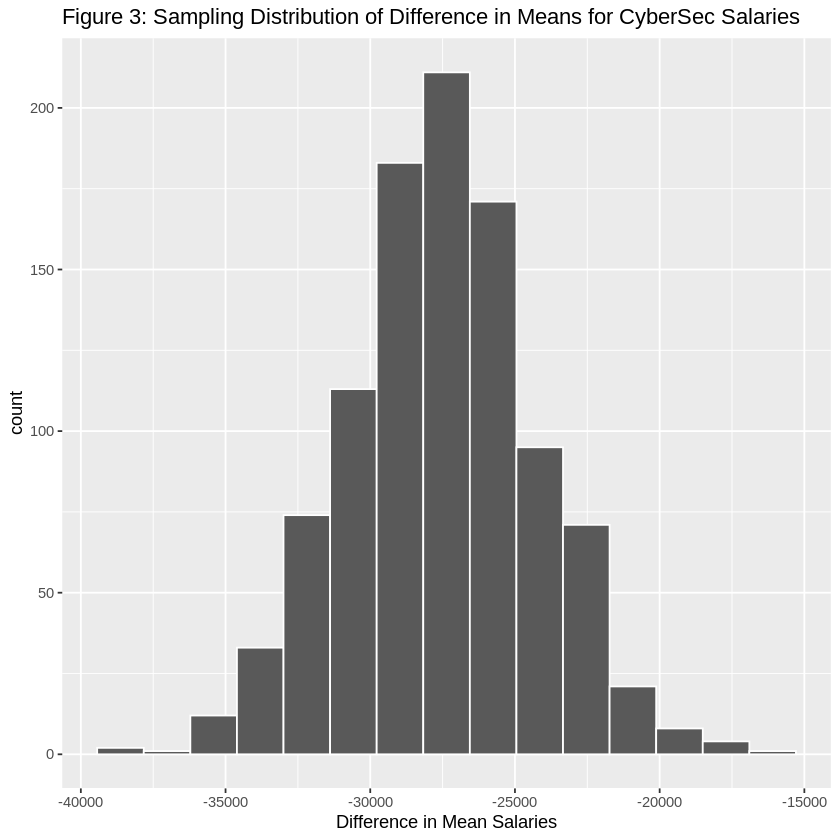

In [17]:
# Obtaining the sampling distribution
bootstrap_dist <-
    bootstrap_dataframe %>%
    visualize() +
    ggtitle('Figure 3: Sampling Distribution of Difference in Means for CyberSec Salaries') +
    xlab('Difference in Mean Salaries')
bootstrap_dist

We also obtain a 90% Confidence Interval from the bootstrapped dataframe using `get_ci`

In [11]:
# calculating the confidence interval
bootstrapped_ci <- 
    bootstrap_dataframe %>%
    get_ci(type = 'percentile', level = 0.90)
bootstrapped_ci

lower_ci,upper_ci
<dbl>,<dbl>
-32829.38,-22181.82


*Table 5: 90% Confidence Intervals*

This is similar to the interval produced by the t-test:
- `conf.low` = -32791.88
- `conf.high` = -22208.18<br>

Since the hypothesized difference, i.e., 0 does not lie in the 90% confidence interval produced, we can conclude that we still reject the null hypothesis at a significance level of 0.10 when calculating through bootstrapping. **This aligns with our conclusion from the t-test.**

When calculating confidence intervals for the difference in means using both bootstrapping and CLT, we appear to get a similar result. But bootstrapping a large number of replicates is very **resource intensive**. CLT on the other hand, uses a **theoretical approximation**, but is less taxing on computational power.

### Analysing The Standard Deviation

The number of data points observed from each work year differ greatly. Table 3 tells us that the total number of observations is 485 in 2021 and 1067 in 2022. To account for this difference, we analyse the standard deviation of the salaries obtained in the two years.

Let’s create a bootstrap data frame that shows the work_year and calculates the standard deviation salary.


In [12]:
set.seed(1000)
# creating the boostrap data frame for standard deviation
sd_bootstrap <- 
    money_relevant %>%
    rep_sample_n(size = nrow(money_relevant), reps = 1000, replace = TRUE) %>%
    group_by(replicate,work_year) %>%
    summarise(sd_salary = sd(salary_in_usd))
head(sd_bootstrap)

`summarise()` has grouped output by 'replicate'. You can override using the
`.groups` argument.


replicate,work_year,sd_salary
<int>,<fct>,<dbl>
1,2021,60892.20
1,2022,62372.14
2,2021,57191.41
2,2022,61428.31
3,2021,58072.00
3,2022,63749.41


*Table 6: Standard Deviation for Salaries*

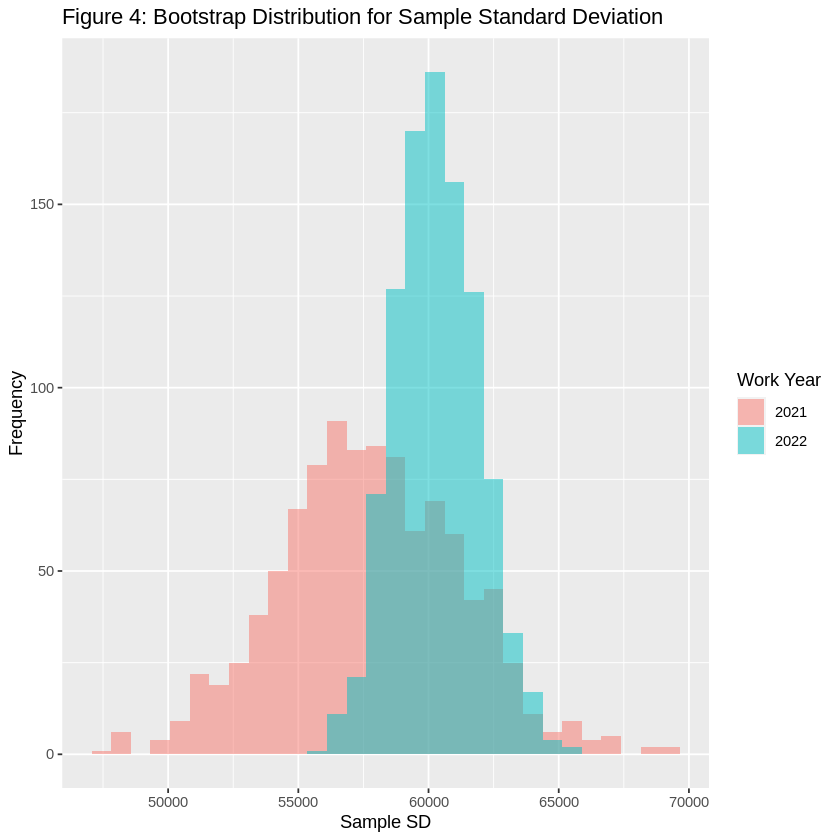

In [18]:
# creating the bootstrap distribution
sd_bootstrap_dist <- sd_bootstrap %>%
    ggplot() +
    geom_histogram(aes(x = sd_salary,fill = work_year),
                   bins = 30,position = 'identity',alpha = 0.5) + 
    labs(fill = 'Work Year', x = 'Sample SD', y = 'Frequency') +
    ggtitle('Figure 4: Bootstrap Distribution for Sample Standard Deviation')
sd_bootstrap_dist

In [14]:
# Obtaining confidence intervals
sd_bootstrap_ci <- 
    sd_bootstrap %>%
    group_by(work_year) %>%
    summarise(lower = quantile(sd_salary,0.05),
              upper = quantile(sd_salary,0.95))
sd_bootstrap_ci

work_year,lower,upper
<fct>,<dbl>,<dbl>
2021,52053.73,63212.83
2022,57820.97,62975.37


*Table 7: Standard Deviation Confidence Intervals*

Both being normally distributed, our histogram shows that the bootstrap distribution of standard deviation in 2021 has a wider spread than that of 2022, with the latter concentrated closer to its center with a greater magnitude. This suggests that the standard deviation of the 2022 sample, in large, has a greater standard deviation than in 2021 as its mean point is slightly to the right of that of 2021, indicating a more precise estimate of the population parameter for the year 2021. Since our bootstrap sampling has drawn the same amount of samples for both year but the figures in Table 3 suggest that the amount of data in the year 2022 is almost 3 times more than that of 2021, it may have caused the sampling for 2022 to be “underrepresented” and omitted various data point, causing a greater range for the data collected.

## Discussion of Our Findings:

### Findings

In our hypothesis tests described above, we see evidence that clearly leads to the rejection of H0. The rejection of the hypothesis that both years have the same mean salary. What this means in our context is that there is a clear change in the mean salary earned in the cyber security sector. Our alternate hypothesis does not declare whether the difference in the mean salaries is an increase or decrease, however, taking the mean of both the years gives us reason to believe that there may be a possible increase in the mean salary in 2022. 

This is not something that can be clearly declared by our current hypothesis tests and will require other tests such as a z test perhaps with a particular value of the mean of 2022, larger than the mean of 2021 salaries. 


### Interpretations and Impacts of the Findings

The difference in mean in the 2 years could mean one of two things: There is either a decline or an increase in the demand for cyber security professionals, or alternatively, an impact on the supply of the current available cyber security professionals in the labor market (for example, we may be facing an acute shortage of such professionals and thus those that have this skill gain a larger compensation). In either event, a possible increase in the mean salaries may suggest to a prospective graduate that this is a highly lucrative industry that is seeking more professionals. Consequently, they might consider honing their skills to fit this particular industry.

A general difference in mean salaries suggests that the cybersecurity labor market is not one that is stagnating, and it means that the salary of an individual is expected to certainly change between the two years that we have investigated. In such a case, those professionals seeking a stable income without possibility of it changing (for the worse in certain cases) may not want to join this industry.


### Limitations

Our hypothesis test has concluded that there is an evident increase in the average salary of cyber security professionals from 2021 to 2022. It is interpreted as a prosperous potential for future computer science major graduates. However, in the late months of 2022 we see a rise of inflation in the United States, raising the question of whether the increase of salary suggests a substantial improvement of payment to workers or it only implies a general economic trend of rising price index. Another possible limitation is the scope of our research. Our analysis has only focused on the consecutive years of 2021 and 2022, and the implication for the greater trend of the labor market is therefore limited and might not reflect a precise estimation for the behavior of the job market. 

### Further Questions

Future researches can expand the scope of ours by comparing the data collected from previous years to generate a more accurate picture of the market’s tendency, as well as analyze the actual increase in the purchasing power of cyber security professionals without the confounding of inflation.

## References
### Dataset 
Infosec and Cyber Security Salaries
(https://infosec-jobs.com/salaries/download/)

### Literature
Lallie, H. S., Shepherd, L. A., Nurse, J. R., Erola, A., Epiphaniou, G., Maple, C., & Bellekens, X. (2021). Cyber security in the age of COVID-19: A timeline and analysis of cyber-crime and cyber-attacks during the pandemic. Computers & Security, 105, 102248.
https://doi.org/10.1016/j.cose.2021.102248

Muthuppalaniappan, M., & Stevenson, K. (2021). Healthcare cyber-attacks and the COVID-19 pandemic: an urgent threat to global health. International Journal for Quality in Health Care, 33(1), mzaa117.
https://doi.org/10.1093/intqhc/mzaa117

